In [1]:
import cProfile
import pstats

from ARGUS_Needle_Network import ARGUS_Needle_Network

In [2]:
img_dir = "../../Data_PNB/stephen_prep"
anno_dir = "../../Data_PNB/stephen_prep"

In [3]:
nnet = ARGUS_Needle_Network()
nnet.setup_vfold_files(img_dir, anno_dir)

vfold_num = 0
run_num = 0
device_num = 0

6.528865451924503 gibibyte
0.01281985267996788 gibibyte
Num images / labels = 30 30
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [4]:
nnet.setup_training_vfold(vfold_num)

Loading dataset: 100%|██████████████████████████| 7/7 [00:13<00:00,  1.92s/it]


../../Data_PNB/stephen_prep/1. 134 AC_Video 1_cropM_prep.nii.gz
         952153 function calls (935560 primitive calls) in 11.030 seconds

   Ordered by: cumulative time
   List reduced from 13614 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   11.030    5.515 /data/aylward/venv_argus/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3362(run_code)
    214/2    0.001    0.000   11.030    5.515 {built-in method builtins.exec}
        1    0.000    0.000   11.030   11.030 /tmp/ipykernel_2145245/400692504.py:3(<cell line: 3>)
        1    0.048    0.048   11.030   11.030 /data/aylward/AnatomicRecon-POCUS-AI/PNB/Experiments/ARUNet-Needle/ARGUS_Needle_Network.py:636(view_training_image)
        2    2.253    1.127   10.548    5.274 /data/aylward/venv_argus/lib/python3.9/site-packages/itk/support/extras.py:1122(imread)
10796/116    0.011    0.000    8.380    0.072 /data/aylward/venv_argus/lib/pyth

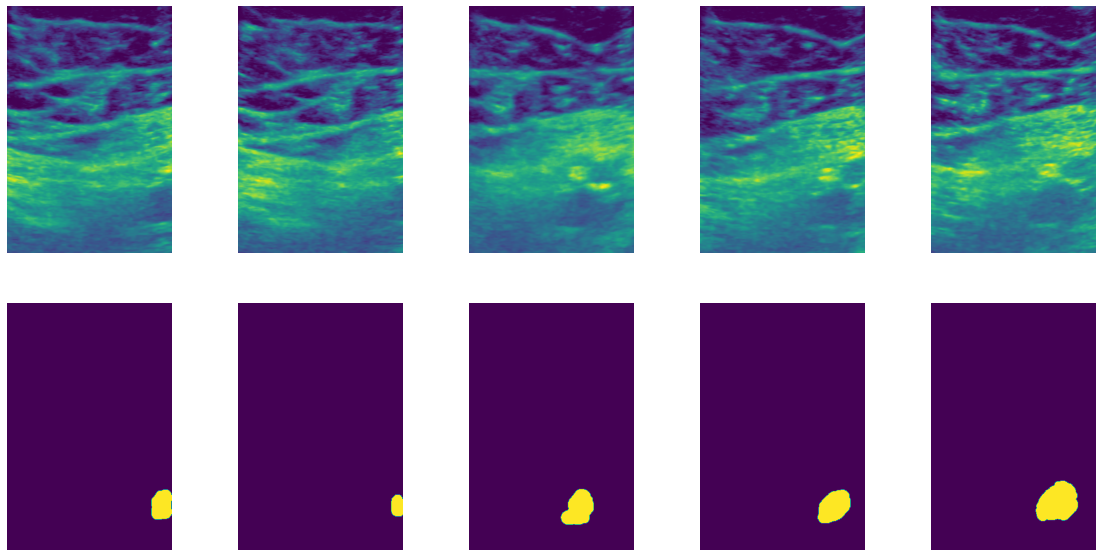

In [5]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_image(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats(20)


         1098863 function calls (1083416 primitive calls) in 4.461 seconds

   Ordered by: internal time
   List reduced from 1038 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      116    2.300    0.020    2.300    0.020 {method 'acquire' of '_thread.lock' objects}
        4    0.667    0.167    0.667    0.167 {built-in method posix.fork}
       42    0.466    0.011    0.466    0.011 {built-in method scipy.ndimage._nd_image.geometric_transform}
        4    0.244    0.061    0.244    0.061 {method 'poll' of 'select.poll' objects}
       84    0.089    0.001    0.089    0.001 {built-in method scipy.ndimage._nd_image.spline_filter1d}
       34    0.040    0.001    0.040    0.001 {built-in method torch._C._cuda_getDeviceCount}
     6008    0.020    0.000    0.081    0.000 /data/aylward/venv_argus/lib/python3.9/site-packages/matplotlib/artist.py:1049(update)
    63657    0.020    0.000    0.026    0.000 /data/aylward/venv_argus/lib

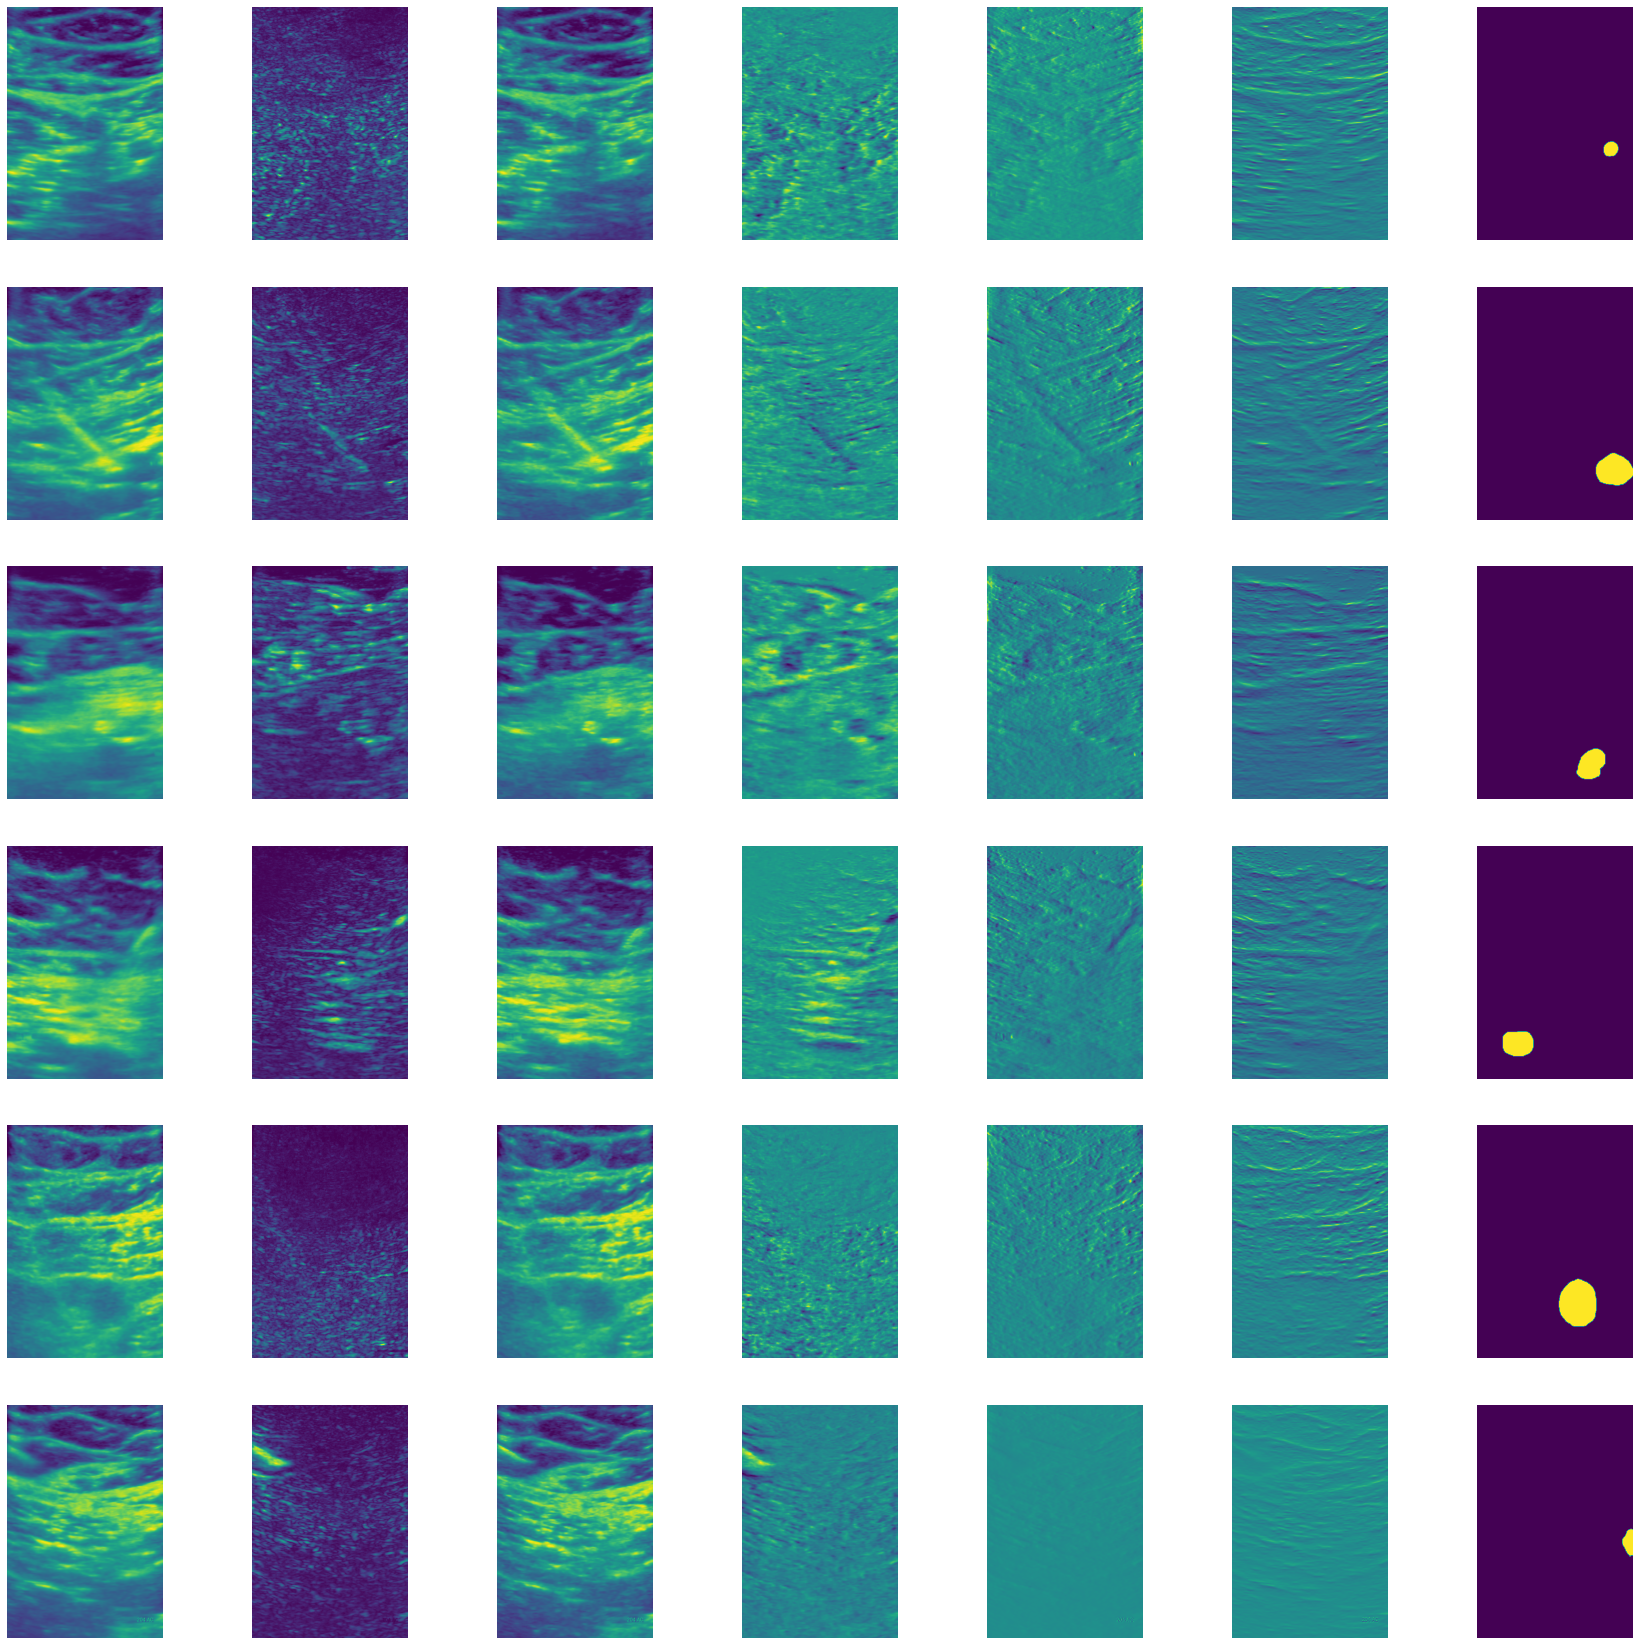

In [6]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_vfold_batch(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(40)


In [7]:
profiler = cProfile.Profile()
profiler.enable()
nnet.max_epochs = 5
nnet.train_vfold(run_num,device_num)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(100)


----------
0: epoch 1/5
0 / 3, train_loss: 0.6750
1 / 3, train_loss: 0.6724
2 / 3, train_loss: 0.6651
3 / 3, train_loss: 0.6808
0 epoch 1 average loss: 0.6733
----------
0: epoch 2/5
0 / 3, train_loss: 0.6688
1 / 3, train_loss: 0.6718
2 / 3, train_loss: 0.6666
3 / 3, train_loss: 0.6575
0 epoch 2 average loss: 0.6662
----------
0: epoch 3/5
0 / 3, train_loss: 0.6692
1 / 3, train_loss: 0.6579
2 / 3, train_loss: 0.6558
3 / 3, train_loss: 0.6637
0 epoch 3 average loss: 0.6617
----------
0: epoch 4/5
0 / 3, train_loss: 0.6637
1 / 3, train_loss: 0.6580
2 / 3, train_loss: 0.6515
3 / 3, train_loss: 0.6644
0 epoch 4 average loss: 0.6594
----------
0: epoch 5/5
0 / 3, train_loss: 0.6514
1 / 3, train_loss: 0.6521
2 / 3, train_loss: 0.6599
3 / 3, train_loss: 0.6588
0 epoch 5 average loss: 0.6555
         172188 function calls (162005 primitive calls) in 16.875 seconds

   Ordered by: internal time
   List reduced from 570 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  perca